##            🐼 The killer Panda's Capstone Project 🐼

# Exploratory data analisys, cleaning, querying  

## Introduction
Here we are going to explain our code and how we arrived at our results and recommendations to the Computing Vision company.

The first dataset we work was the from `tn.movie_budgets.csv` for
## Budget/Profit/Earnings

In [1]:
#First we import the necessary libraries that we need
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn

tn_budgets = pd.read_csv('data/tn.movie_budgets.csv', index_col=0)

#We can make a checkout of the dataset, know their columns and kind of values
#Also is useful if we check the information of our dataset
#If think you may need see this information, plese uncomment the code below

#tn_budgets.info()
#tn_budgets.head(10)

We can see we do not have missing values, all the type of data is object and we have four columns.
As you can see, `production_budget`, `domestic_gross`, `worldwide_gross` are columns for money so we need them in type int, let's make a cleaning delenting the `$ and ,`

In [2]:
def cleaning(columns):
    for x in columns:
        tn_budgets[x]=tn_budgets[x].apply(lambda x: x.replace(",","").replace("$",""))
        tn_budgets[x]=pd.to_numeric(tn_budgets[x])

columns =  ['production_budget', 'domestic_gross','worldwide_gross']
cleaning(columns)

tn_budgets["earnings"]=tn_budgets["worldwide_gross"]-tn_budgets["production_budget"]
tn_budgets.sort_values(by="earnings", ascending=False)

tn_budgets["Profit"]=(tn_budgets["earnings"]/tn_budgets["worldwide_gross"])*100


### Ploting with seaborn
#### Earning

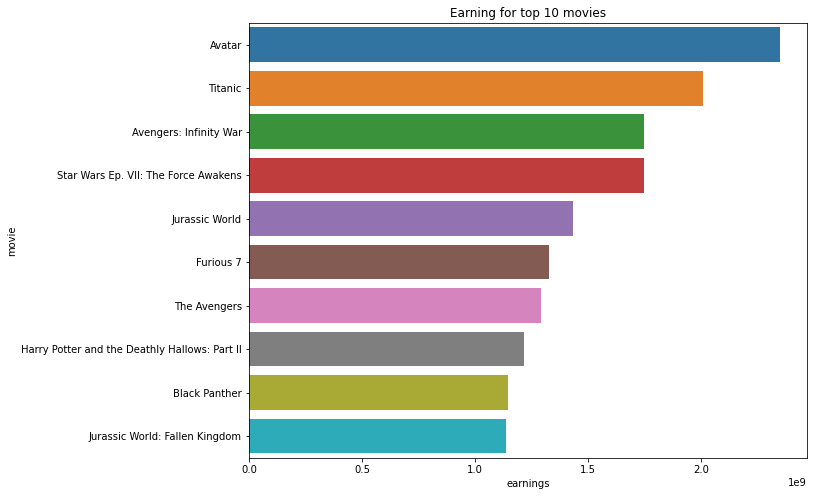

In [3]:
tp1=tn_budgets.sort_values(by="earnings", ascending=False).head(10).copy()
topten1 = tp1.loc[:,["movie", "earnings"]]

fig= plt.subplots(figsize=(10, 8))
seaborn.barplot(x ="earnings", y ="movie", data = topten1)
plt.title("Earning for top 10 movies")
plt.show()

#### Profit

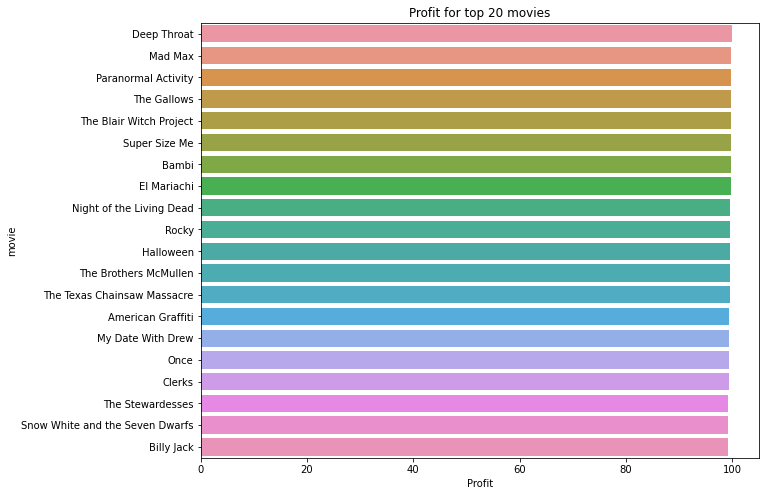

In [4]:
#We also want to see how it see ploting the profit vs the movie
tptw=tn_budgets.sort_values(by="Profit", ascending=False).head(20).copy()
toptw = tptw.loc[:,["movie", "Profit"]]


fig= plt.subplots(figsize=(10, 8))
seaborn.barplot(x ="Profit", y ="movie", data = toptw)
plt.title("Profit for top 20 movies")
plt.show()

#### Earning and budget

In [6]:
tp2 = tn_budgets.sort_values(by="earnings", ascending=False).head(10).copy()
topten2 = tp2.loc[:,["Movie ID","production_budget", "worldwide_gross"]]

MovieID = ["A","B","C","D","E","F","G","H","I","J"]
tp2["Movie ID"]= MovieID

topten2 = topten2.set_index("Movie ID")
stopten = topten2.stack().reset_index()
stopten.columns = ['Movie ID', 'Gross', 'USD']
fig= plt.subplots(figsize=(10, 8))
seaborn.barplot(y ="Movie ID", x="USD", hue="Gross", data = stopten)
plt.title("Earning vs budget for top 10 movies")
plt.show()

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['Movie ID'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

### Genres of the movies

In [ ]:
# DataFrame to explain what is A, B, C etc
genres_tp=["Action, Adventure, Sci-fi, Fantasy", 
           "Drama",  "Action, Sci-fi",
           "Action, Sci-fi-, Adventure, Fantasy", 
           "Action, Sci-fi-, Thriller, Adventure",
           "Action, Adventure", 
           "Action, Fantasy, Adventure, Sci-fi", 
           "Adventure, Fantasy, Mystery, Drama",
           "Action, Fantasy, Adventure, Sci-fi", 
           "Action, Adventure, Sci-Fi"]

director_tp=["James Cameron", "James Cameron", 
             "Anthony Russo, Joe Russo", 
             "J.J. Abrams", "Colin Trevorrow",
             "James Wan", "Joss Whedon", "David Yates", 
             "Ryan Coogler", "J.A. Bayona"]

title = list(tp2["movie"])

ID_df=pd.DataFrame(zip(MovieID,title,genres_tp, director_tp), columns = ["MovieID", "Title", "Genre", "Director"])
ID_df.set_index("MovieID")

## Best movie Category based on Rating and Number of votes

In [ ]:
conn = sqlite3.connect('data/im.db')
pd.read_sql("""
SELECT movie_basics.genres AS Category,
       movie_ratings.averagerating AS Rating,
       movie_ratings.numvotes as NumberVotes       
FROM movie_basics  
INNER JOIN movie_ratings ON 
           movie_basics.movie_id = movie_ratings.movie_id  
  WHERE movie_ratings.numvotes >= 900000 
  AND movie_ratings.averagerating >= 8.1
  GROUP BY movie_basics.genres 
  ORDER BY Rating  DESC  
  ;""", conn)